# Masking and flattening HPF data with `TelFit` and Gaussian Processes

*gully*  
October 15, 2021

In [a previous tutorial](https://muler.readthedocs.io/en/latest/tutorials/Masking_and_flattening_plus.html) we used a pristine telluric template and [advanced Gaussian Process smoothing techniques](https://speakerdeck.com/dfm/an-astronomers-introduction-to-gaussian-processes-v2) to get a refined continuum fit.  The previous tutorials' approaches are probably more precise, but take extra effort of masking in order to obtain the seemingly simple goal of a flattened spectrum.  Often we want a mere quicklook of the flattened spectrum.  Here we demonstrate the new `.flatten()` method, mirrored and abridged from the [lightkurve](http://docs.lightkurve.org) framework.

In [1]:
from muler.hpf import HPFSpectrum
%config InlineBackend.figure_format='retina'

In [2]:
filename = '../../../muler_example_data/HPF/01_A0V_standards/Goldilocks_20210801T083618_v1.0_0036.spectra.fits'
raw_spectrum = HPFSpectrum(file = filename, order=6)

In [3]:
spectrum = raw_spectrum.sky_subtract(method='vector').remove_nans().deblaze().normalize()

In [4]:
flattened_spectrum = spectrum.flatten()

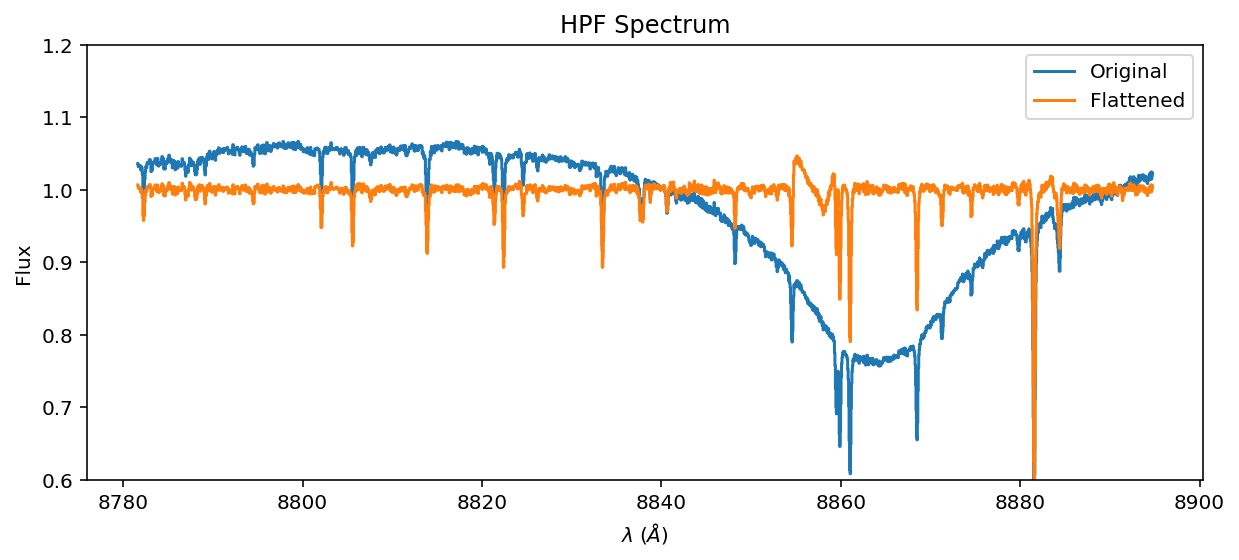

In [5]:
ax = spectrum.plot(label='Original');
flattened_spectrum.plot(ax=ax, label='Flattened');
ax.legend();

And voilà!  We have a coarsely flattened spectrum without all the effort of manually masking lines.  You can see an artifact at $\lambda = 8860\;Å$.  You can tune the flatten method with some of its keyword argments:

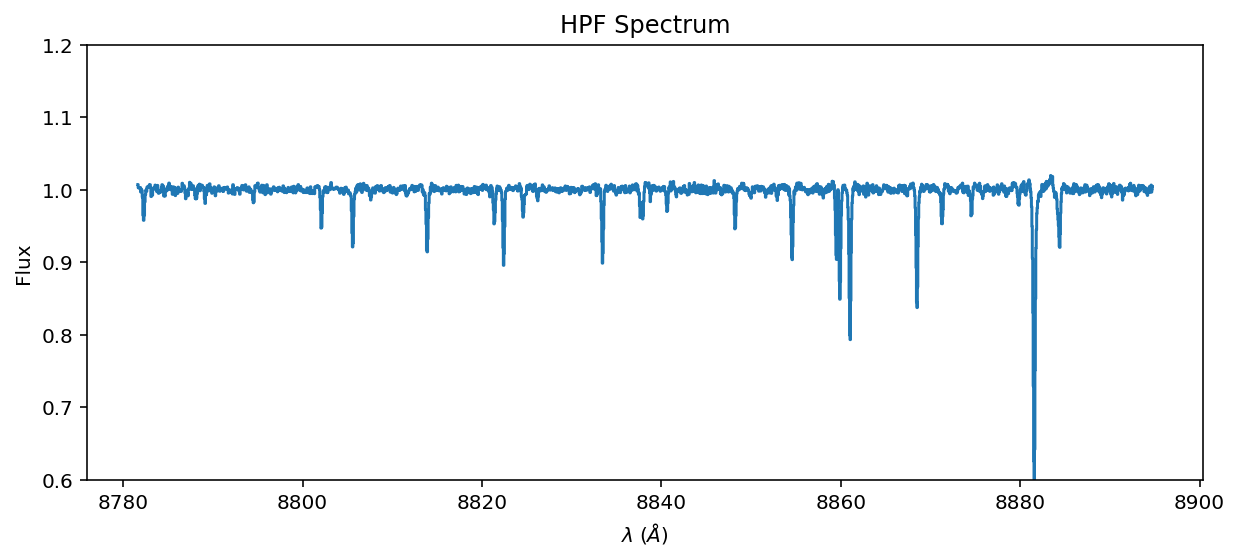

In [6]:
spectrum.flatten(window_length=61).plot();

That's better! :)  You can see some [ringing artifacts](https://en.wikipedia.org/wiki/Ringing_artifacts) near the window size of 61 pixels.  It's useful to inspect the trend by using the `return_trend=True` *kwarg*, which will return two spectra: the flattened spectrum and the fitted trend spectrum.

In [7]:
flattened_spectrum, trend = spectrum.flatten(window_length=81, niters=13, sigma=3.5, return_trend=True)

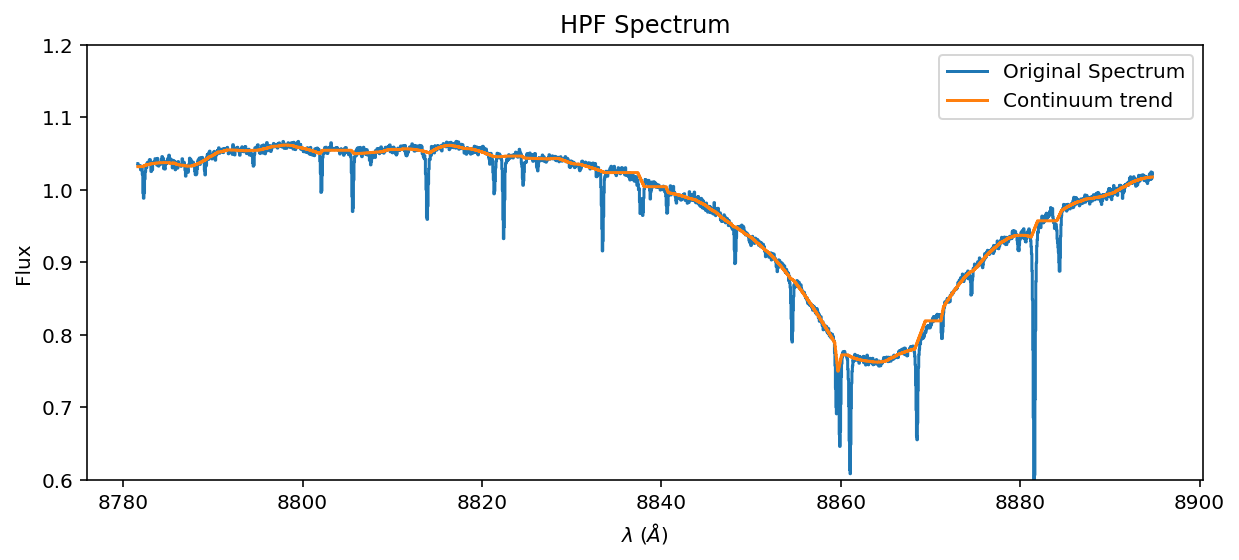

In [8]:
ax = spectrum.plot(label='Original Spectrum')
trend.plot(ax=ax, label='Continuum trend')
ax.legend();

You can see some signal self-substraction in the line at $\lambda =  8860\;Å$, and the continuum fit drives through weak lines near 8785 Å.  We recommend dividing out the known A0V template spectrum as we did in the previous tutorials.  There's also a way to hand-in a `mask=` *kwarg* to preserve features you want to keep like telluric lines in this case.